# 🔎 Análisis Exploratorio: La Calidad del Aire en Madrid (2001-2022)

Este proyecto utiliza el dataset “MadridPolution2001-2022.csv”, que contiene registros horarios de contaminantes atmosféricos medidos en la estación Escuelas Aguirre (Madrid) desde enero de 2001 hasta marzo de 2022. El objetivo es analizar la calidad del aire en el centro de Madrid a lo largo de dos décadas y descubrir cómo ha cambiado la contaminación en la ciudad, identificando tendencias a largo plazo, patrones estacionales y episodios de polución extrema. Para ello, se estudiarán los registros horarios de 14 contaminantes clave, tomados desde enero de 2001 hasta marzo de 2022.

A continuación, se detalla qué es cada uno de estos contaminantes y por qué es importante medirlos.

---

## ¿Qué contaminantes se miden y qué significan?

Los datos recogidos incluyen diferentes tipos de partículas y gases que afectan tanto a nuestra salud como al medio ambiente. Se pueden agrupar en las siguientes categorías:

### 💨 Partículas en suspensión: El polvo que no se ve

Son pequeñas partículas sólidas y líquidas que flotan en el aire. Su peligrosidad depende de su tamaño: cuanto más pequeñas, más profundamente pueden penetrar en nuestros pulmones.

* **PM10**: Partículas con un diámetro inferior a 10 micrómetros. Incluyen polvo, polen, cenizas y hollín. Pueden irritar los ojos, la nariz y la garganta.
* **PM2.5**: Partículas con un diámetro inferior a 2.5 micrómetros, también conocidas como "partículas finas". Son mucho más peligrosas, ya que pueden llegar a los alvéolos pulmonares e incluso pasar al torrente sanguíneo. Se originan principalmente en la quema de combustibles de vehículos e industria.

### 🚗 Gases relacionados con el tráfico y la combustión

La mayoría de estos gases se producen al quemar combustibles como la gasolina, el diésel o el gas natural. Son los principales responsables de la "boina" de contaminación de las grandes ciudades.

* **CO (Monóxido de carbono)**: Un gas tóxico que se genera cuando la combustión es incompleta. Su principal fuente en las ciudades son los tubos de escape de los coches.
* **NO (Monóxido de nitrógeno)** y **NO2 (Dióxido de nitrógeno)**: Comúnmente agrupados como **NOx (Óxidos de nitrógeno)**, son gases que se forman a altas temperaturas en los motores de los vehículos y en las centrales eléctricas. El NO2 es el gas de color marrón-rojizo que se ve en las nubes de contaminación y está directamente relacionado con enfermedades respiratorias.
* **SO2 (Dióxido de azufre)**: Proviene principalmente de la quema de combustibles fósiles con contenido de azufre, como el carbón y el petróleo, en la industria y la calefacción. Es uno de los causantes de la lluvia ácida.

### ☀️ Ozono "malo": Un contaminante de verano

* **O3 (Ozono)**: A diferencia del ozono bueno de la estratosfera que nos protege del sol, el ozono a nivel del suelo es un contaminante. No se emite directamente, sino que se forma cuando los óxidos de nitrógeno (NOx) y otros compuestos reaccionan con la luz solar. Por eso, sus niveles suelen ser más altos en días soleados y calurosos, provocando irritación en las vías respiratorias.

### ⛽ Compuestos Orgánicos Volátiles (COVs)

Son un grupo amplio de sustancias químicas que se evaporan fácilmente a temperatura ambiente. Proceden de los combustibles, disolventes, pinturas y también de los tubos de escape.

* **BEN (Benceno)**, **TOL (Tolueno)** y **EBE (Etilbenceno)**: Son compuestos aromáticos derivados del petróleo, muy presentes en la gasolina. Son tóxicos y el benceno, en particular, es un conocido cancerígeno.
* **CH4 (Metano)**, **NMHC (Hidrocarburos no metánicos)** y **TCH (Hidrocarburos totales)**: Estos términos agrupan a todos los compuestos de hidrocarburos en el aire. El metano (CH4) es un potente gas de efecto invernadero, mientras que los NMHC son importantes porque contribuyen a la formación de ozono. El TCH es simplemente la suma de ambos.

El análisis de estas variables nos permitirá obtener una radiografía completa de la evolución del aire que respiramos en Madrid y entender mejor el impacto de nuestras actividades diarias en el entorno urbano.

---

## 🌱 Alba (limpieza y calidad de datos)

Para asegurar la fiabilidad de nuestro análisis, el primer paso es realizar una limpieza exhaustiva y una evaluación de la calidad de los datos. Un dataset limpio y bien estructurado es fundamental para obtener conclusiones válidas.

En esta fase, nos centraremos en:
1. Validar y transformar el formato de las fechas, que es la base de nuestro análisis temporal.
2. Cuantificar y analizar los valores nulos para entender qué variables tienen datos más completos.
3. Verificar la existencia de filas duplicadas que puedan distorsionar los resultados.
4. Asegurar que los tipos de datos son correctos para cada variable.
5. Detectar posibles valores anómalos, como mediciones negativas, que no tendrían sentido físico.

Comenzamos por convertir la columna `Time` a un formato `datetime`. Esto es crucial para que Python la reconozca como una fecha y no como simple texto, permitiéndonos realizar operaciones temporales. Además, creamos **columnas adicionales (year, month, day, hour)** para facilitar la agrupación y el análisis de patrones en diferentes escalas de tiempo.

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Cargar el dataset
csv_path = r"data/MadridPolution2001-2022.csv"

# Leer sin parsear fechas inicialmente para detectar el nombre de columna correcto
df = pd.read_csv(csv_path)

# --- LIMPIEZA DE FECHA ---
# La columna "time" la convertimos directamente a datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce") # Con errors="coerce"

# Verificamos si se han generado nulos al convertir la columna "Time" a formato datetime
print("Nulos en la columna Time después de la conversión: ", df["Time"].isna().sum())

# Creamos columnas auxiliares para explorar temporalmente el dataset, pero de momento no haremos una limpieza estricta
df["year"] = df["Time"].dt.year
df["month"] = df["Time"].dt.month
df["day"] = df["Time"].dt.day
df["hour"] = df["Time"].dt.hour


# Mostramos los resultados
print("Columnas detectadas en el CSV:", df.columns.tolist())
print("Dimensiones del dataset:", df.shape)
print(df.head(10))

Nulos en la columna Time después de la conversión:  0
Columnas detectadas en el CSV: ['Time', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2', 'TCH', 'TOL', 'year', 'month', 'day', 'hour']
Dimensiones del dataset: (172622, 19)
                       Time   BEN  CH4   CO  EBE  NMHC     NO   NO2    NOx  \
0 2001-01-01 00:00:00+00:00   4.0  NaN  0.0  2.0   NaN   66.0  67.0  168.0   
1 2001-01-01 01:00:00+00:00   9.0  NaN  0.0  5.0   NaN  146.0  71.0  294.0   
2 2001-01-01 02:00:00+00:00   9.0  NaN  0.0  5.0   NaN  190.0  73.0  364.0   
3 2001-01-01 03:00:00+00:00  10.0  NaN  0.0  5.0   NaN  170.0  75.0  335.0   
4 2001-01-01 04:00:00+00:00   8.0  NaN  0.0  4.0   NaN  102.0  67.0  224.0   
5 2001-01-01 05:00:00+00:00   3.0  NaN  1.0  2.0   NaN   63.0  60.0  157.0   
6 2001-01-01 06:00:00+00:00   2.0  NaN  0.0  1.0   NaN   28.0  47.0   90.0   
7 2001-01-01 07:00:00+00:00   2.0  NaN  1.0  1.0   NaN   33.0  43.0   93.0   
8 2001-01-01 08:00:00+00:00   2.0  N

#### **Analizamos la presencia de valores nulos**
Uno de los problemas más comunes en los datasets del mundo real es la ausencia de datos. Medir la cantidad de valores nulos en cada columna nos permite evaluar la fiabilidad de cada variable. A continuación, calculamos cuántos datos faltan en cada columna y qué porcentaje representan sobre el total de registros.

In [16]:
# Contamos la cantidad de nulos que hay en cada columna
total_filas = len(df)

nulos_por_columna = df.isnull().sum()

conteo_de_nulos = nulos_por_columna.to_frame("Nulos").assign(Porcentaje=lambda x: (x["Nulos"] / total_filas * 100).round(2)).sort_values("Nulos", ascending=False)

print("--- Cantidad total de nulos en cada columna y porcentaje---")
print(conteo_de_nulos)

--- Cantidad total de nulos en cada columna y porcentaje---
            Nulos  Porcentaje
PM25        66222       38.52
NMHC        32385       18.84
TCH         32307       18.79
CH4         32305       18.79
TOL          8031        4.67
EBE          7725        4.49
BEN          7668        4.46
PM10         4286        2.49
O3           1543        0.90
SO2           556        0.32
CO            292        0.17
NOx             8        0.00
NO              7        0.00
Time            0        0.00
NO2             0        0.00
year            0        0.00
month           0        0.00
day             0        0.00
hour            0        0.00
estacion        0        0.00
dia_semana      0        0.00
tipo_dia        0        0.00


Para visualizar mejor la magnitud del problema, un gráfico de barras es ideal. Nos permite comparar de un vistazo qué contaminantes tienen la mayor proporción de datos ausentes. Esto será clave para decidir si debemos descartar alguna variable o si necesitamos aplicar técnicas de imputación de datos en análisis futuros.

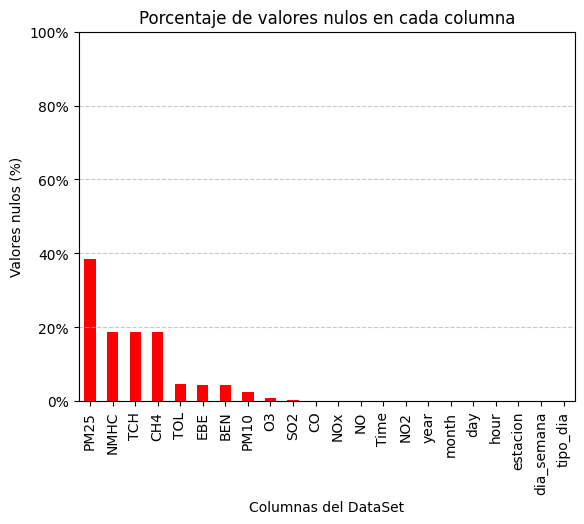

In [17]:
conteo_de_nulos['Porcentaje'].plot(kind="bar", color='red', legend=False)
plt.title("Porcentaje de valores nulos en cada columna")
plt.xlabel("Columnas del DataSet")
plt.ylabel("Valores nulos (%)")

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, 100)
ejes = plt.gca()
ejes.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{int(y)}%'))
plt.show()

#### **Interpretación de los resultados:**

El análisis de valores nulos revela información muy importante:

PM2.5 es la variable más afectada, con casi un 40% de datos ausentes. Esto sugiere que las mediciones de partículas finas pueden haber sido inconsistentes o que el equipo de medición no estuvo operativo durante largos periodos, por lo que cualquier análisis sobre PM2.5 debe hacerse con cautela.

Los hidrocarburos NMHC, TCH y CH4 también presentan una cantidad considerable de nulos, aunque por debajo del 20%.

Por otro lado, contaminantes clave como NO, NO2, O3, SO2 y CO tienen un porcentaje de nulos muy bajo (< 5%), lo que los convierte en candidatos muy fiables para nuestro análisis de tendencias.

Es una excelente noticia que las columnas temporales (Time, year, month, day, hour) no tengan ningún valor nulo (0%). Esto nos garantiza que tenemos un registro horario completo a lo largo de los 21 años del dataset, lo cual es fundamental para el análisis de series temporales.

---

#### **Verificación de Duplicados**
Otro paso importante es comprobar si existen filas completamente duplicadas. En un dataset de series temporales, cada registro horario debería ser único. La presencia de duplicados podría indicar errores en la recolección o procesamiento de los datos, y su eliminación es necesaria para no sesgar los cálculos estadísticos.

In [3]:
duplicados = df.duplicated().sum()
print(f"Numero de filas duplicadas: {duplicados}")

# En caso de que detectase algún duplicado, con el método drop_duplicates eliminaría la columna entera
if duplicados > 0:
    df.drop_duplicates()
    print("Duplicados eliminados. Nuevo tamaño del dataset: ", df.shape)

Numero de filas duplicadas: 0


**Resultado:** El análisis confirma que no existen filas duplicadas en el dataset. Cada registro corresponde a una medición horaria única, lo que refuerza la integridad de nuestros datos.

---

#### **Revisión de Tipos de Datos**
Ahora, nos aseguramos de que cada columna tenga el tipo de dato adecuado. Las variables de contaminantes deben ser numéricas (enteros o decimales) para poder realizar cálculos matemáticos, y las de fecha deben tener el formato datetime. Si una columna numérica se hubiera cargado como texto, cualquier operación matemática fallaría.

In [4]:
print("\nTipos de datos detectados en el dataset:")
print(df.dtypes)

# Comprobamos si hay columnas numéricas cargadas como texto
numeric_cols = df.select_dtypes(include=["object"]).columns
print("\nColumnas tipo 'object' (texto):", numeric_cols.tolist())


Tipos de datos detectados en el dataset:
Time     datetime64[ns, UTC]
BEN                  float64
CH4                  float64
CO                   float64
EBE                  float64
NMHC                 float64
NO                   float64
NO2                  float64
NOx                  float64
O3                   float64
PM10                 float64
PM25                 float64
SO2                  float64
TCH                  float64
TOL                  float64
year                   int32
month                  int32
day                    int32
hour                   int32
dtype: object

Columnas tipo 'object' (texto): []


**Resultado:** La revisión muestra que todas las columnas tienen el formato correcto. Las variables de los contaminantes son de tipo `float64` (decimal), las columnas de tiempo auxiliares son `int64` (entero), y la columna principal `Time` es `datetime64[ns]`. No hay columnas numéricas interpretadas erróneamente como texto.

---

#### **Detección de Valores Anómalos**
Finalmente, investigamos la existencia de valores que no tienen sentido desde una perspectiva lógica o física. En la medición de contaminantes, no es posible tener concentraciones negativas. También revisamos los rangos (mínimos y máximos) de cada variable para detectar posibles valores extremos que pudieran ser errores de medición.

In [5]:
# Buscar valores negativos en las columnas numéricas
negativos = (df.select_dtypes(include=["float64", "int64"]) < 0).sum()
print("\nValores negativos por columna:")
print(negativos[negativos > 0])

# Ver rango de cada variable (mínimo y máximo)
rangos = df.describe().T[["min", "max"]]
print("\nRangos de valores por columna:")
print(rangos)


Valores negativos por columna:
Series([], dtype: int64)

Rangos de valores por columna:
          min     max
BEN       0.0    43.0
CH4       0.0     4.0
CO        0.0    10.0
EBE       0.0    81.0
NMHC      0.0     9.0
NO        1.0  1041.0
NO2       4.0   402.0
NOx       5.0  1910.0
O3        0.0   199.0
PM10      1.0   367.0
PM25      0.0   215.0
SO2       1.0   158.0
TCH       0.0    10.0
TOL       0.0   174.0
year   2001.0  2022.0
month     1.0    12.0
day       1.0    31.0
hour      0.0    23.0


**Resultado:** El análisis confirma que no hay valores negativos en ninguna de las columnas de contaminantes, lo cual es coherente.

Al observar los rangos, vemos que los valores mínimos son cero o cercanos a cero, como es de esperar. Aunque algunos máximos puedan parecer elevados, es plausible que correspondan a episodios de alta contaminación, por lo que no los eliminaremos en esta fase.

---

### **Conclusión de la Limpieza de Datos 🧐**

Tras completar el proceso de limpieza y validación, podemos concluir que el dataset tiene una **calidad general buena y es robusto** para el análisis exploratorio.

Los puntos clave son:

* **El eje temporal es completo y coherente**, sin duplicados ni errores de formato, lo que proporciona una base sólida para el análisis.

* Los datos de los principales contaminantes relacionados con el tráfico y la salud pública **(NOx, CO, O3, SO2)** son fiables y presentan muy pocos valores ausentes.

* La principal debilidad del dataset es la **alta proporción de valores nulos en la columna PM2.5 (~40%), así como en los hidrocarburos (CH4, NMHC, TCH)**. Esto deberá tenerse en cuenta en las siguientes fases del análisis, ya que las conclusiones sobre estas variables serán menos representativas.

El dataset está ahora preparado para la siguiente etapa: el **análisis general y descriptivo**.

---

## 📊 Robert (análisis general y descriptivo)

Tras la limpieza y la mejora de la calidad de los datos que se nos ofrece en este dataset, se procederá a realizar un análisis un poco más general de los datos obtenidos.

Esta parte del proyecto se dividirá en secciones, donde cada sección tiene un objetivo clave y, posteriormente, una mejora.

Esta mejora trata de llegar a conclusiones más técnicas y efectivas a la hora de mostrar los datos sobre la calidad del aire de las últimas décadas de Madrid, llegando a mostrar la evolución de los distintos contaminantes que rodean el cielo de la ciudad, como también histogramas generales donde se muestra la calidad del aire de cada año, por estaciones, etc.

Tras el desarrollo, finalmente se obtendrán las principales conclusiones de los gráficos y los datos obtenidos.

---


### 1️⃣ SECCIÓN PRIMERA

En esta primera sección veremos como objetivo clave el promedio anual, donde se obtendrá una tabla resumen por año y contaminante de la concentración media de cada contaminante por año.

Por otro lado, como mejora, se va a visualizar la evolución anual de los principales contaminantes utilizando gráficos de líneas.

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
year,,,,,,,,,,,,,,
2001,4.43,NaN,0.59,3.27,NaN,84.68,74.08,203.94,26.10,39.09,NaN,14.60,NaN,14.59
2002,NaN,1.02,0.70,NaN,0.00,119.34,74.65,257.59,12.62,35.45,NaN,18.41,1.09,NaN
2003,0.83,1.01,0.31,1.29,0.00,72.71,74.62,186.11,30.04,33.04,NaN,15.57,1.04,8.96
2004,0.72,1.01,0.24,1.27,0.00,73.16,76.49,188.67,28.17,32.62,NaN,13.99,1.04,8.84
2005,0.17,1.01,0.15,0.79,0.01,63.02,76.75,173.36,29.12,32.91,NaN,13.29,1.06,3.43
2006,0.09,0.88,0.09,0.45,0.01,59.73,72.10,163.66,29.89,41.12,NaN,12.12,1.03,4.27
2007,0.32,0.97,0.09,0.95,0.01,57.06,68.44,155.93,28.33,34.90,NaN,13.13,1.03,6.16
2008,0.22,0.98,0.05,0.77,0.00,41.73,63.29,127.28,31.84,27.27,NaN,12.41,1.01,5.26
2009,0.25,1.01,0.03,0.78,0.00,39.15,54.24,114.39,39.80,28.17,15.59,11.97,1.02,5.00


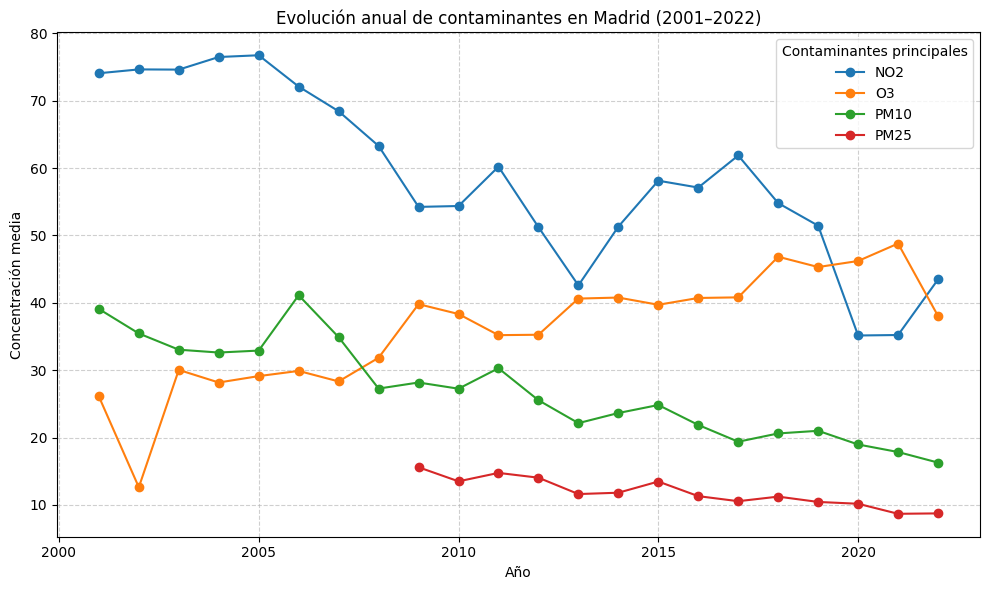

In [6]:
# Creamos una lista con todos los contaminantes que se recogen
contaminantes = ["BEN","CH4","CO","EBE","NMHC","NO","NO2","NOx","O3","PM10","PM25","SO2","TCH","TOL"]

# Agrupamos todos los datos de todos los contaminantes en años y entre todos los datos sacamos su media correspondiente
resumen = df.groupby("year")[contaminantes].mean().round(2)

# Mostramos los datos
display(resumen)

# Para la mejora de este apartado, creamos una lista con la selección de los principales contaminantes
principales = ["NO2", "O3", "PM10", "PM25"]

# Filtrar el resumen solo a esos contaminantes
resumen_principales = resumen[principales]

# Creamos el gráfico y lo mostramos
plt.figure(figsize=(10,6))
for col in resumen_principales.columns:
    plt.plot(resumen_principales.index, resumen_principales[col], marker="o", label=col)

plt.title("Evolución anual de contaminantes en Madrid (2001–2022)")
plt.xlabel("Año")
plt.ylabel("Concentración media")
plt.legend(title="Contaminantes principales")
# Mostramos el gráfico con delimitadores para mayor visibilidad
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### CONCLUSIONES

1. NO2 muestra niveles muy altos a inicios de los 2000 (≈75 μg/m³), con una tendencia descendente constante, situándose por debajo de 40 μg/m3 en los últimos años.

2. PM10 y PM2.5 también descienden de forma marcada con los años, reflejando mejoras en la calidad del aire.

3. Ozono (O₃) sigue la tendencia contraria: aumenta progresivamente, con picos importantes en los últimos años, lo que sugiere un efecto secundario de la reducción de NOx.

---

### 2️⃣ SECCIÓN SEGUNDA

Para esta sección se va a obtener un gráfico de barras mensual por año donde se mostrará el mes con la peor calidad del aire, es decir, el mes que tuvo la media más alta de NO2.

Por otro lado, como mejora, se mostrará el mes más crítico para cada año donde se va a visualizar la tendencia mensual agregada.

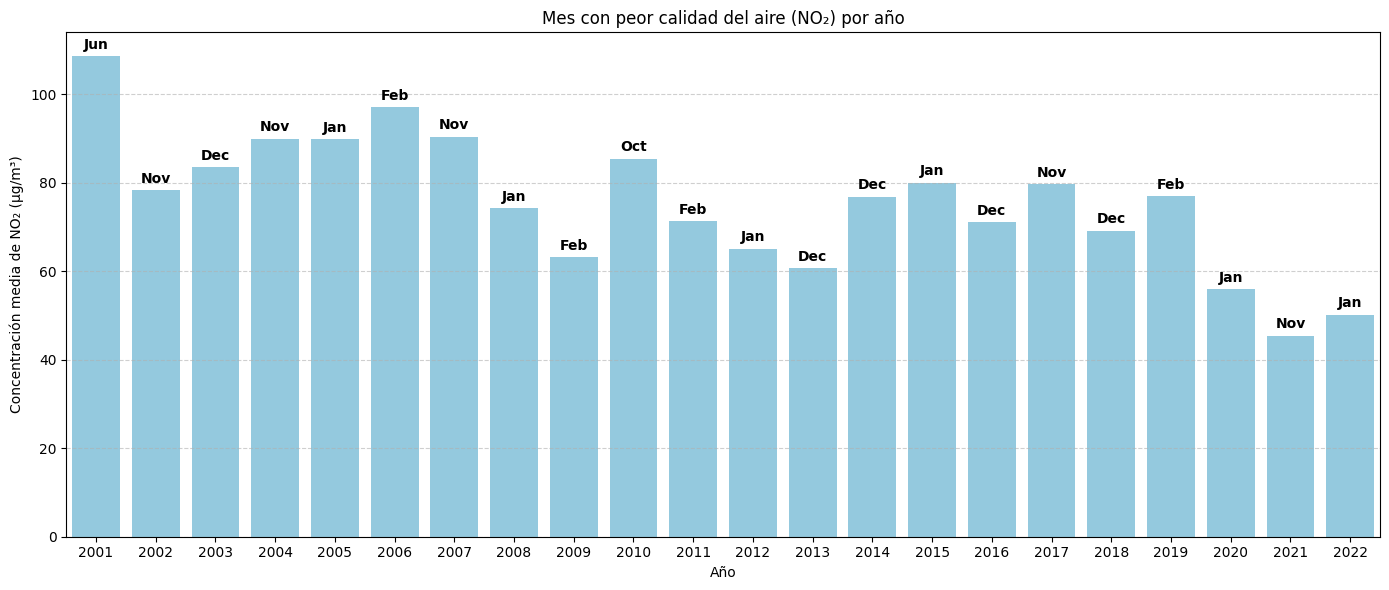

In [7]:
# ---------- LIMPIEZA DE DATOS ----------
# Convertimos NO2 de Float a Int
df["NO2"] = pd.to_numeric(df["NO2"], errors="coerce")

# Eliminamos filas donde NO2 o date sean NaN
df = df.dropna(subset=["Time", "NO2"])

# Obtenemos la media mensual de dióxido de nitrógeno NO2
mensual_no2 = df.groupby(["year", "month"])["NO2"].mean().reset_index()

# Obtenemos el mes con peor promedio de cada año
peor_mes_anual = mensual_no2.loc[mensual_no2.groupby("year")["NO2"].idxmax()].copy()

# Agregar el nombre del mes
peor_mes_anual["mes_nombre"] = peor_mes_anual["month"].apply(lambda x: calendar.month_abbr[x])

# Gráfico
plt.figure(figsize=(14,6))
ax = sns.barplot(data=peor_mes_anual, x="year", y="NO2", dodge=False, color="skyblue")

# Añadir el nombre del mes encima de cada barra
for p, mes in zip(ax.patches, peor_mes_anual["mes_nombre"]):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,  # posición horizontal: centro de la barra
        height + 1,                    # posición vertical: un poco arriba de la barra
        mes,                           # texto a mostrar
        ha="center",                   # centrar el texto horizontalmente
        va="bottom",                   # alinear el texto al fondo
        fontsize=10,
        fontweight="bold"
    )

plt.title("Mes con peor calidad del aire (NO₂) por año")
plt.xlabel("Año")
plt.ylabel("Concentración media de NO₂ (µg/m³)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#### CONCLUSIONES

1. Los meses con peor promedio anual de NO2 son claramente de temporada fría/otoño tardío: Ene + Nov + Dic + Feb = 20 de 22 años (90.9%). Es decir, casi siempre el peor mes del año para NO2 cae en invierno/fin de otoño.

2. Últimos 5 años (2018–2022):
    - 2018 = Dec, 2019 = Feb, 2020 = Jan, 2021 = Nov, 2022 = Jan — igual, predominio de meses fríos.

3. Excepciones puntuales: 2001 = Jun (NO2 ≈ 108.54 µg/m3) y 2010 = Oct (NO2 ≈ 85.43 µg/m3). Probablemente episodios aislados o condiciones meteorológicas concretas.

4. Interpretación breve: esto confirma que la estacionalidad invernal (más tráfico/uso de calefacción y condiciones de poca dispersión) es el principal determinante de los peores meses para NO2 en Madrid. Encaja con el patrón semanal (picos entre semana) y la evolución anual observada.

---

### 3️⃣ SECCIÓN TERCERA

En esta sección se va a mostrar el rango de concentraciones de O3 más frecuentes, tanto en un histograma global y un histograma por año.

Por otro lado, como mejora se va a analizar la variabilidad anual y estacional de O3.

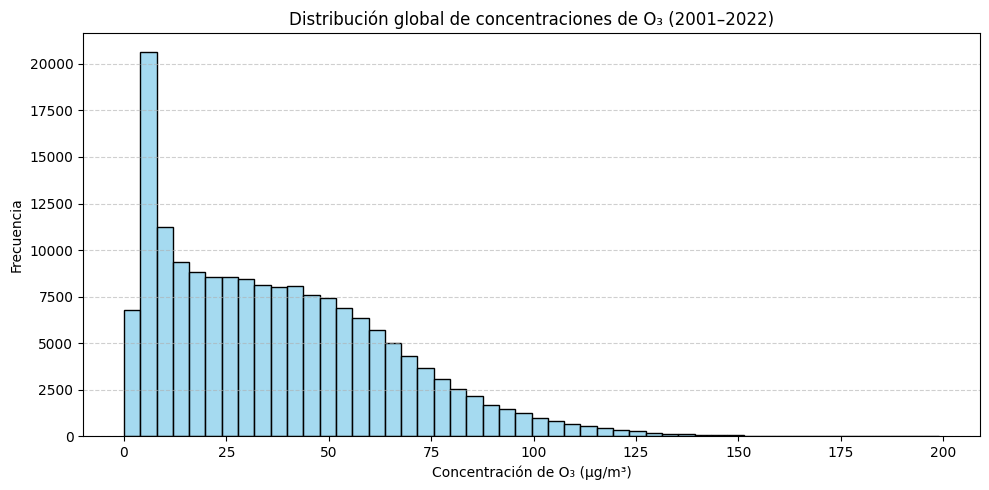

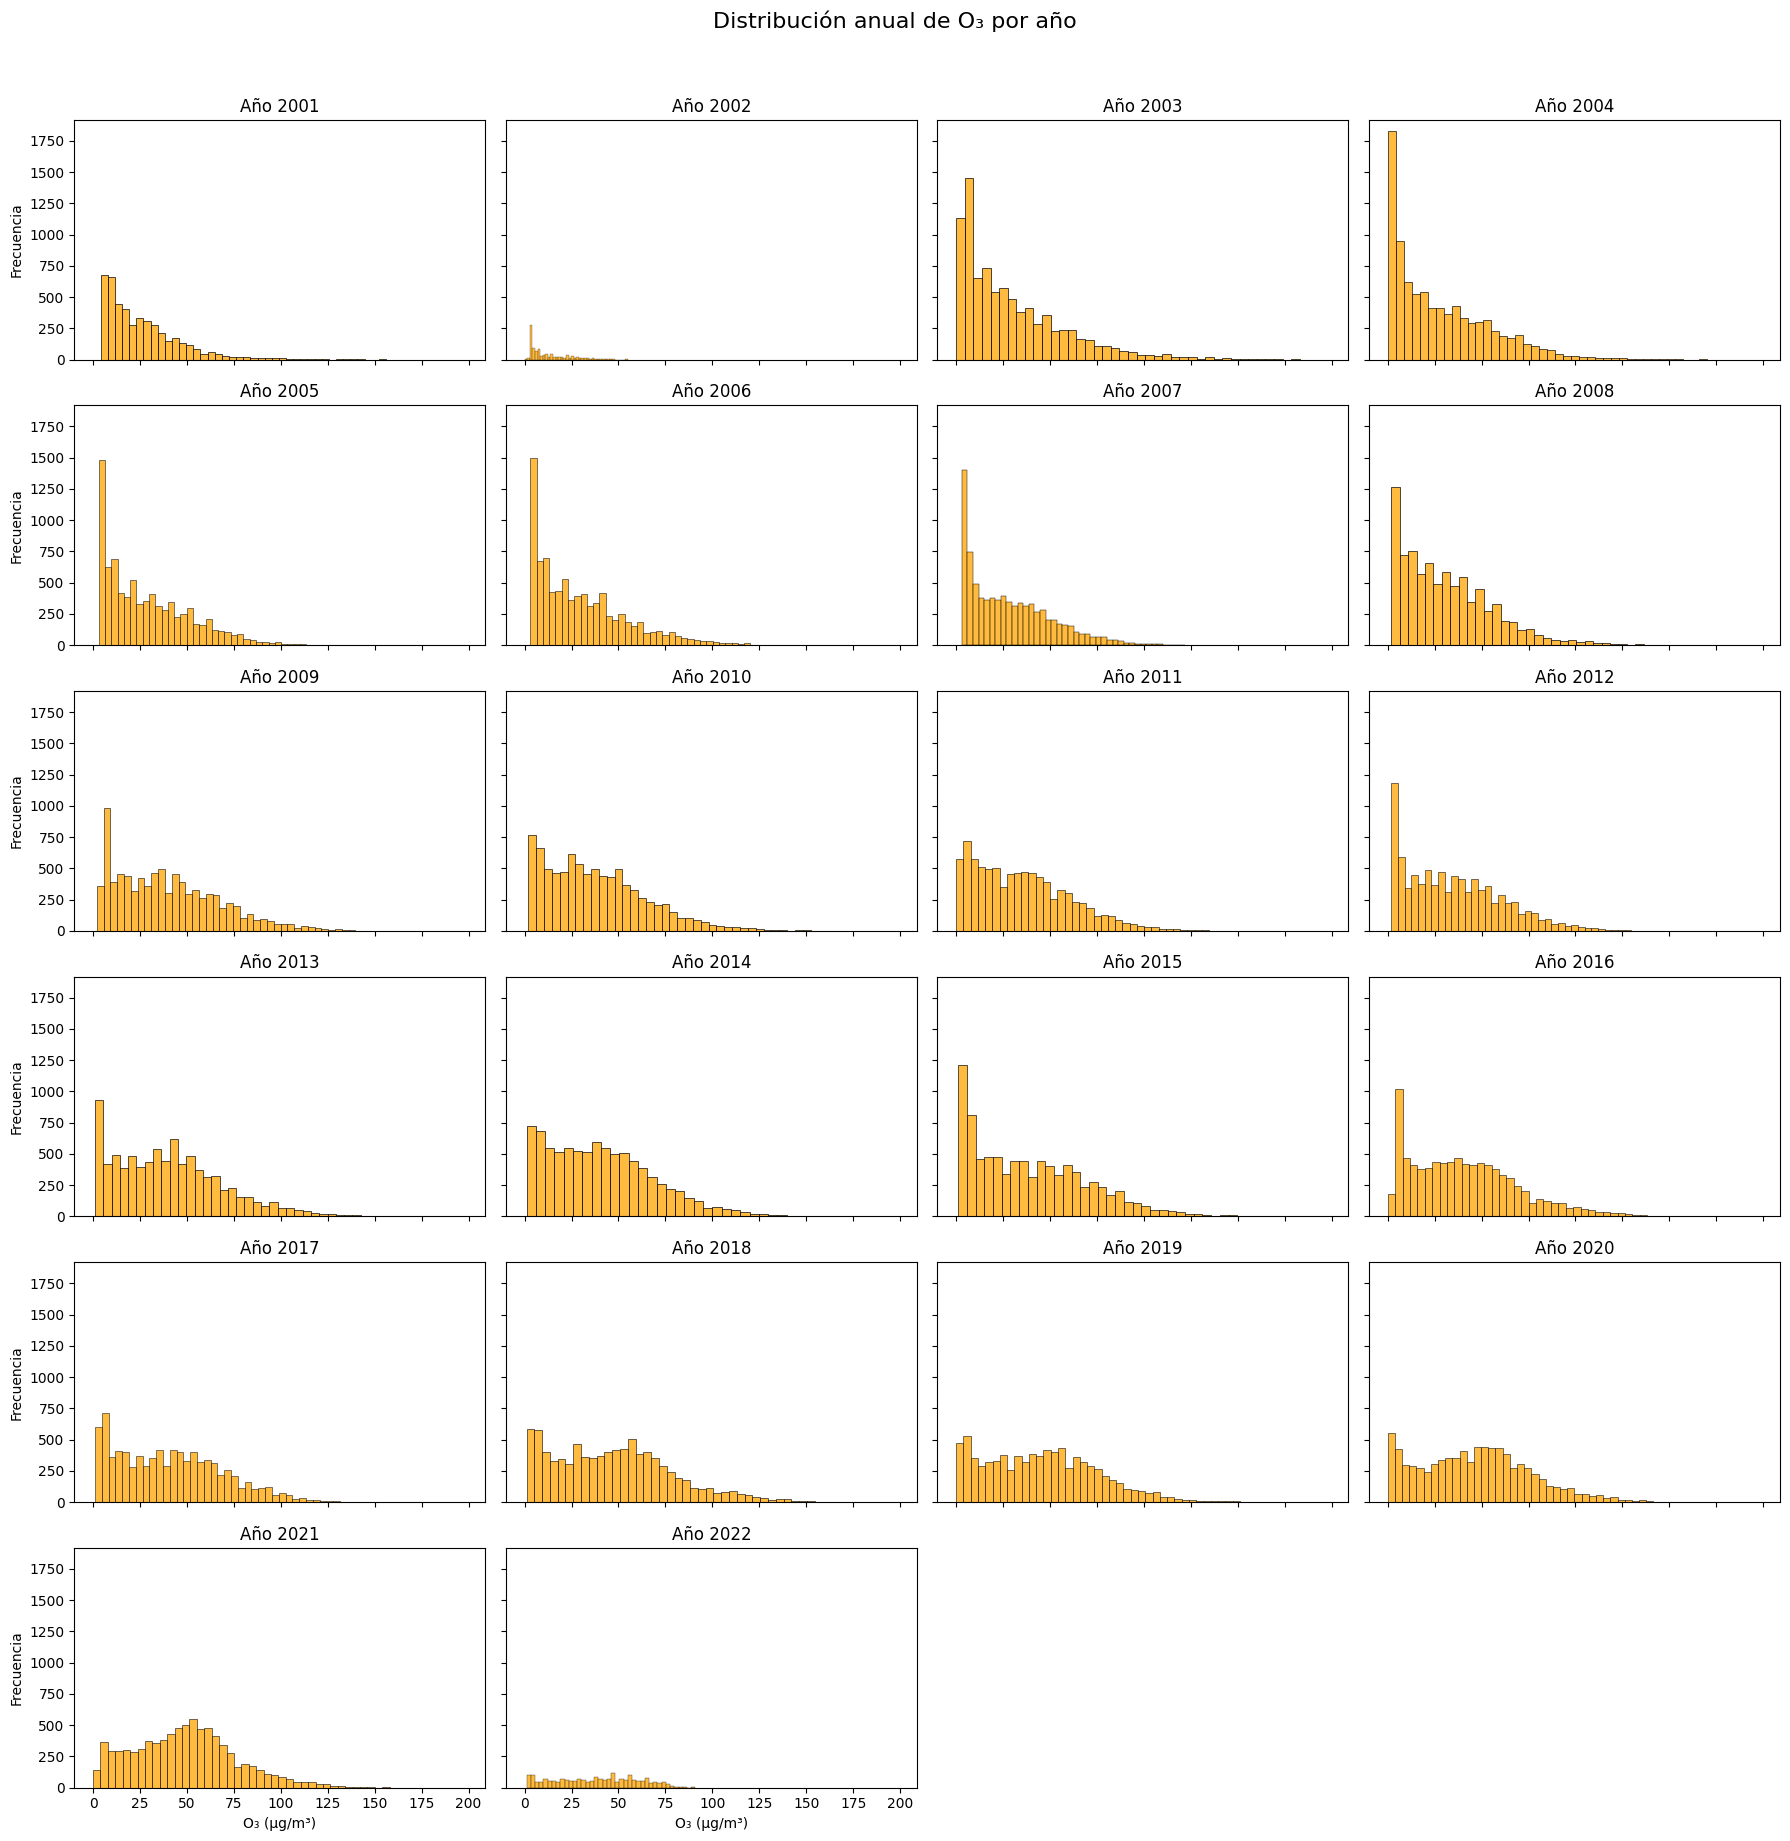

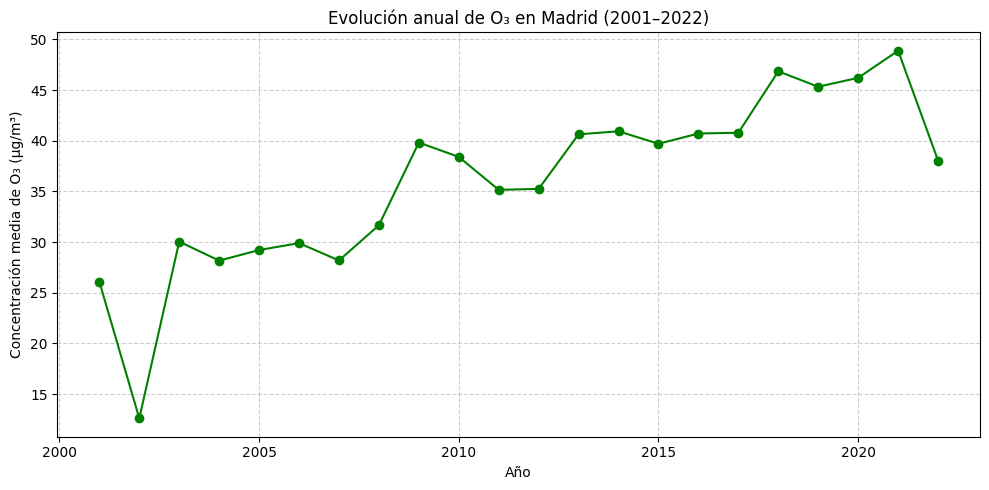

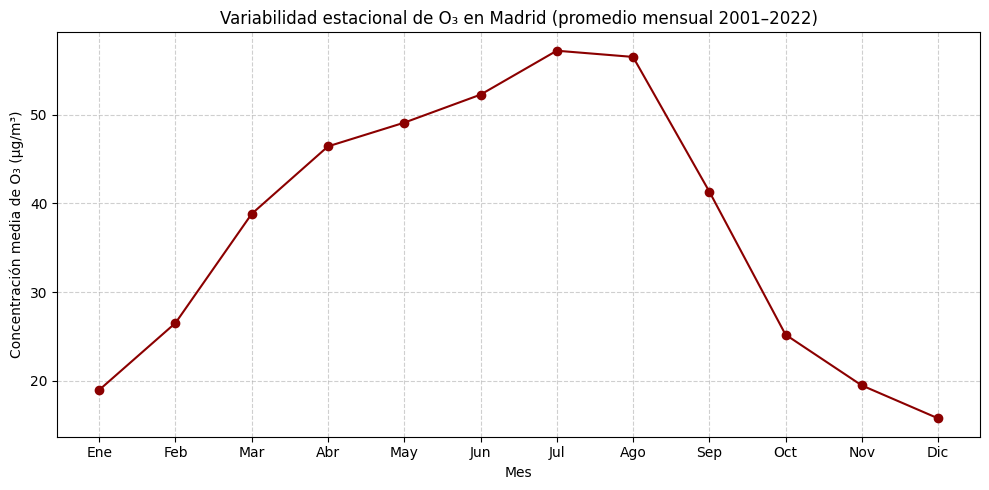

In [8]:
# Histograma global de O3
plt.figure(figsize=(10,5))
sns.histplot(df["O3"].dropna(), bins=50, color="skyblue")
plt.xlabel("Concentración de O₃ (µg/m³)")
plt.ylabel("Frecuencia")
plt.title("Distribución global de concentraciones de O₃ (2001–2022)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Histograma por año
years = sorted(df["year"].unique())
n_years = len(years)

fig, axes = plt.subplots(n_years//4 + 1, 4, figsize=(18, 3*(n_years//4 + 1)), sharex=True, sharey=True)
axes = axes.flatten()

for i, y in enumerate(years):
    sns.histplot(df.loc[df["year"] == y, "O3"].dropna(), bins=40, color="orange", ax=axes[i])
    axes[i].set_title(f"Año {y}")
    axes[i].set_xlabel("O₃ (µg/m³)")
    axes[i].set_ylabel("Frecuencia")

# Eliminar subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribución anual de O₃ por año", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# A partir de la media, obtenemos la evolución anual de O3
o3_anual = df.groupby("year")["O3"].mean()

plt.figure(figsize=(10,5))
plt.plot(o3_anual.index, o3_anual.values, marker="o", color="green")
plt.xlabel("Año")
plt.ylabel("Concentración media de O₃ (µg/m³)")
plt.title("Evolución anual de O₃ en Madrid (2001–2022)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Variabilidad estacional (promedio mensual de todos los años)
o3_mensual = df.groupby("month")["O3"].mean()

plt.figure(figsize=(10,5))
plt.plot(o3_mensual.index, o3_mensual.values, marker="o", color="darkred")
plt.xticks(range(1,13), ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])
plt.xlabel("Mes")
plt.ylabel("Concentración media de O₃ (µg/m³)")
plt.title("Variabilidad estacional de O₃ en Madrid (promedio mensual 2001–2022)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


#### CONCLUSIONES

Podemos observar que O3 muestra una distribución con episodios extremos, aumento anual significativo (≈1.13 µg/m3/año) y clara estacionalidad veraniega; es un contaminante que ha empeorado en promedio durante 2001–2022 y cuya gestión requiere atención distinta a la de NO2/PM (foco en precursores fotoquímicos y meteorología).

- Distribución global: la concentración de O3 es asimétrica a la derecha (skew ≈ 0.826).

    - N de muestras: 170 379.

    - Media ≈ 37.21 µg/m3, mediana = 33.0 µg/m3, σ ≈ 27.78, p95 = 89 µg/m3, máx = 199 µg/m3.

    - Interpretación: hay una cola de valores altos (episodios), por eso la media > mediana y el percentil 95 elevado.

- Histograma por año: la forma es generalmente unimodal con cola derecha cada año; la posible aparición de picos extremos varía por año (episodios locales/regionales), pero la ubicación central de la distribución se desplaza al alza en los últimos años.

- Evolución anual: la media anual de O3 sube de ~26.09 µg/m3 (2001) a ~38.05 µg/m3 (2022).

    - Pendiente de la tendencia lineal ≈ +1.131 µg/m3 por año.

    - Cambio relativo 2001→2022 ≈ +45.8%.

    - Interpretación: aumento sostenido de O3 a lo largo del periodo (no un simple ruido), probablemente ligado a factores fotoquímicos y cambios en el balance NOx / VOC y condiciones meteorológicas (menos titración por NO, más radiación/temperaturas favorables a la formación de O3).

- Estacionalidad: máximos claramente en verano: Jul (57.24 µg/m3), Ago (56.54 µg/m3), Jun (52.28 µg/m3).

    - Interpretación: típico patrón fotoquímico — más luz solar y temperaturas elevadas favorecen la generación de ozono.

---

### 4️⃣ SECCIÓN CUARTA (FINAL)

En esta sección se analizarán los picos diarios, donde se mostrará en un gráfico el día que se presentó la concentración más alta de PM10 en cada año.

Para finalizar, como mejora, se muestra un gráfico final en el que se puede observar los días de picos extremos, donde se analizan los patrones estacionales o de eventos puntuales.

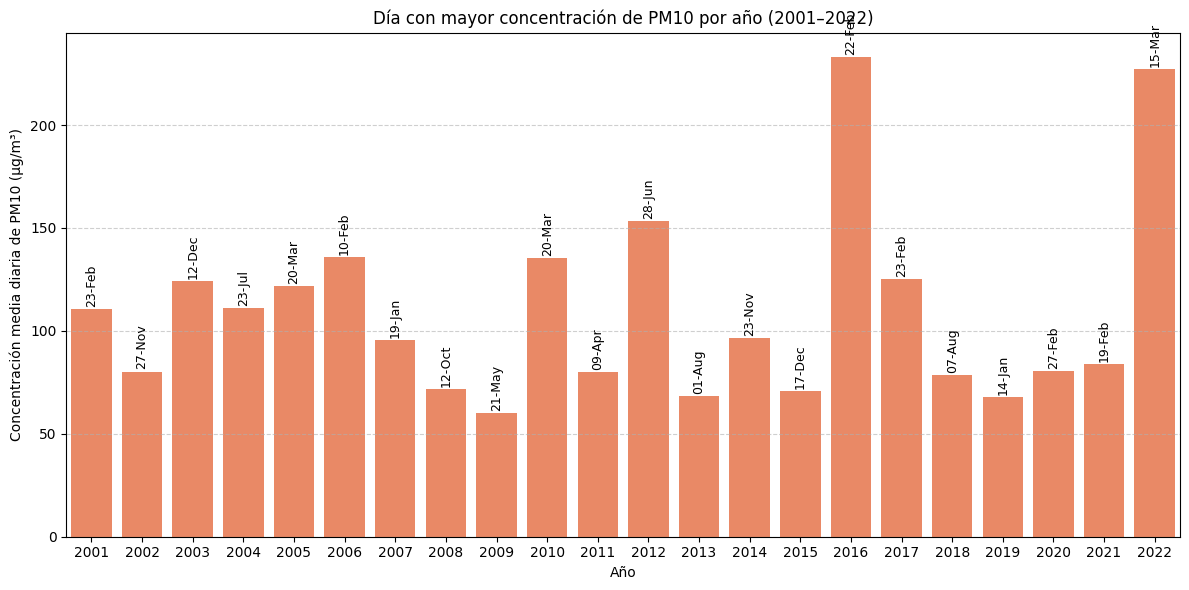

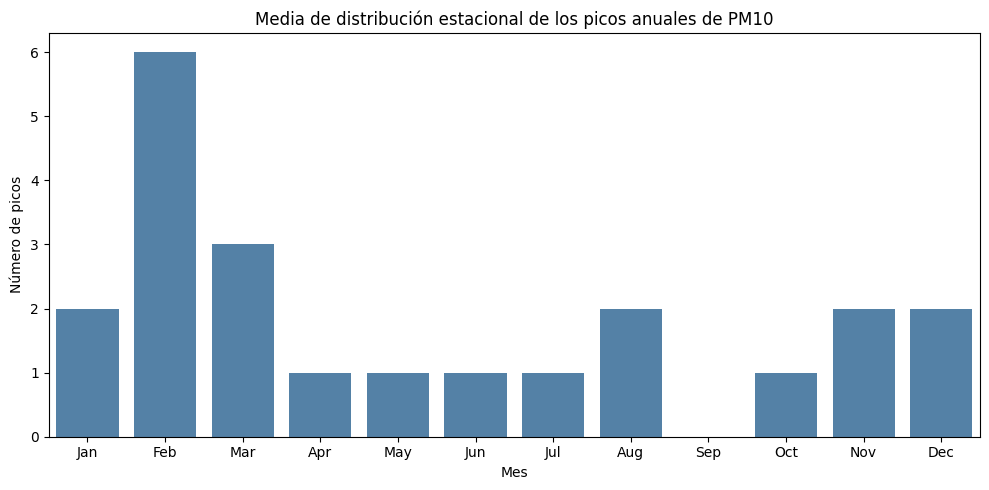

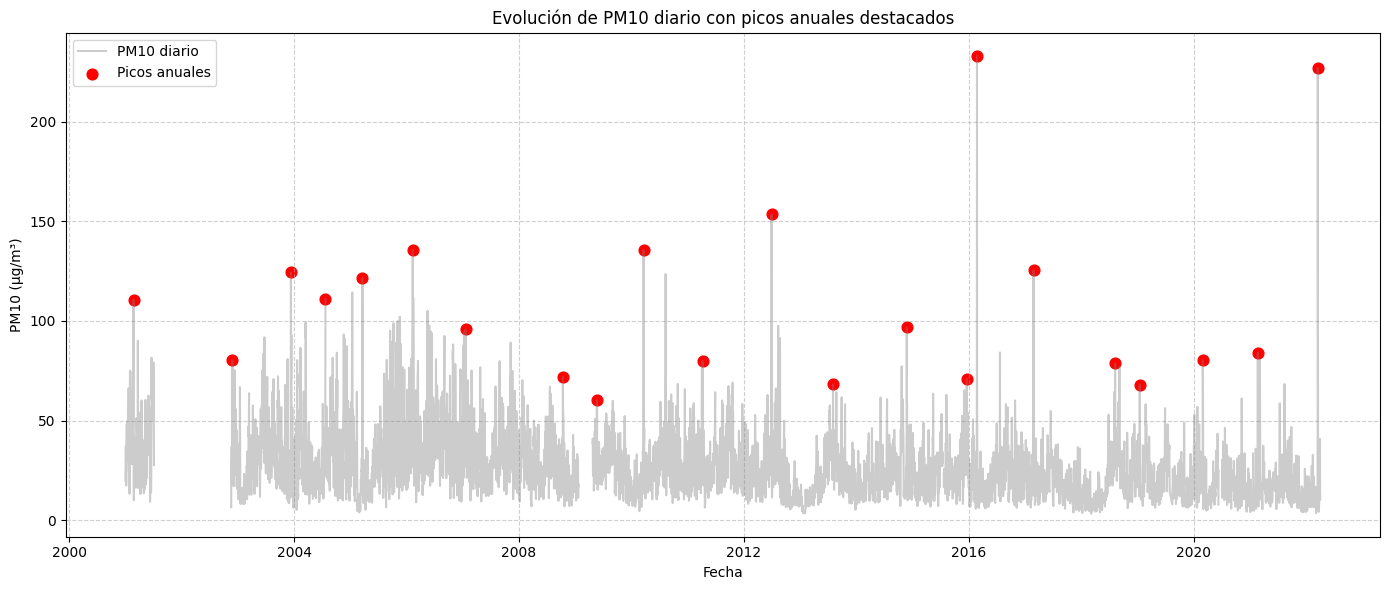

In [9]:
# Primero calculamos la media diaria de PM10
pm10_diario = df.groupby(df["Time"].dt.date)["PM10"].mean().reset_index()
pm10_diario["Time"] = pd.to_datetime(pm10_diario["Time"])
pm10_diario["year"] = pm10_diario["Time"].dt.year
pm10_diario["month"] = pm10_diario["Time"].dt.month

# Obtenemos el día con mayor PM10 en cada año
pico_anual_pm10 = pm10_diario.loc[pm10_diario.groupby("year")["PM10"].idxmax()].copy()

# Creamos un gráfico en el que se muestran los picos anuales
plt.figure(figsize=(12,6))
sns.barplot(data=pico_anual_pm10, x="year", y="PM10", color="coral")

# Anotar la fecha exacta sobre cada barra
for p, fecha in zip(plt.gca().patches, pico_anual_pm10["Time"].dt.strftime("%d-%b")):
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 1, fecha,
             ha="center", va="bottom", fontsize=9, rotation=90)

plt.title("Día con mayor concentración de PM10 por año (2001–2022)")
plt.xlabel("Año")
plt.ylabel("Concentración media diaria de PM10 (µg/m³)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# En la parte de mejora de esta sección, se muestra los picos estacionales o eventuales

# Extraemos solo el mes de los picos
pico_anual_pm10["mes_nombre"] = pico_anual_pm10["month"].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(10,5))
sns.countplot(data=pico_anual_pm10, x="mes_nombre", order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], color="steelblue")
plt.title("Media de distribución estacional de los picos anuales de PM10")
plt.xlabel("Mes")
plt.ylabel("Número de picos")
plt.tight_layout()
plt.show()

# Creamos una línea temporal con todos los máximos diarios
plt.figure(figsize=(14,6))
plt.plot(pm10_diario["Time"], pm10_diario["PM10"], alpha=0.4, color="gray", label="PM10 diario")
plt.scatter(pico_anual_pm10["Time"], pico_anual_pm10["PM10"], color="red", s=60, label="Picos anuales")
plt.title("Evolución de PM10 diario con picos anuales destacados")
plt.xlabel("Fecha")
plt.ylabel("PM10 (µg/m³)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


#### CONCLUSIONES

Se puede observar que los picos diarios de PM10 ocurren con más frecuencia a finales de invierno / inicio de primavera (Feb–Mar) y son episódicos pero crecientes en magnitud. Estos episodios (ej. 2016 y 2022) son los responsables de los valores máximos anuales y requieren medidas puntuales/meteorológicas además de reducción de emisiones de fondo.

- Tendencia de los picos anuales:

    - Pendiente lineal sobre los picos ≈ +0.982 µg/m3 por año.

    - Primer pico (2001-02-23): 110.58 µg/m3 → Último pico (2022-03-15): 227.00 µg/m3 (aumento puntual del 105% comparando esos extremos).

    - Interpretación: hay una tendencia al alza en la magnitud de picos durante el periodo, aunque los valores están fuertemente influenciados por episodios esporádicos (polvo, incendios, condiciones adversas de dispersión). Esto sugiere que, pese a mejoras en la media anual, los episodios extremos no han desaparecido e incluso pueden haberse intensificado.

---

## David (comparaciones y correlaciones)

- Estacionalidad en un año: ¿Qué contaminante presenta mayores diferencias entre invierno y verano?

                BEN       CH4        CO       EBE      NMHC         NO  \
estacion                                                                 
Invierno   0.785283  1.006453  0.174762  0.890304  0.003270  67.708046   
Otoño      0.463768  0.994159  0.087738  0.876069  0.003481  46.922874   
Primavera  0.377124  1.000200  0.054261  0.621723  0.000888  28.363833   
Verano     0.205701  1.000913  0.025249  0.644782  0.001199  19.942616   

                 NO2         NOx         O3       PM10       PM25        SO2  \
estacion                                                                       
Invierno   64.797898  168.609213  20.315874  25.235023  12.344871  14.863771   
Otoño      62.544868  134.482035  28.603173  27.730152  11.929108   8.850050   
Primavera  52.442698   95.932062  44.713142  23.319640  10.253714   8.712228   
Verano     53.350945   83.922996  55.357469  31.153285  12.941292   7.101120   

                TCH       TOL  
estacion                       
Invierno  

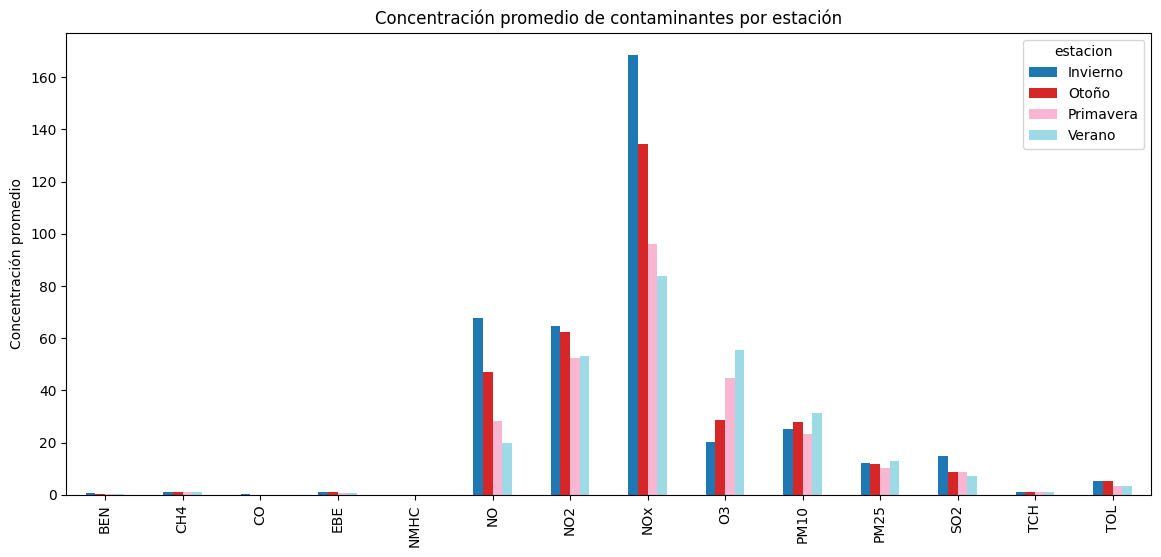

In [10]:
# Añadimos las estaciones como una columna más
def estacion(mes):
    if mes in [12, 1, 2]:
        return "Invierno"
    elif mes in [6, 7, 8]:
        return "Verano"
    elif mes in [3, 4, 5]:
        return "Primavera"
    else:
        return "Otoño"
    
df["estacion"] = df["month"].apply(estacion)

# Promedio de contaminantes por estación
contaminantes = ["BEN","CH4","CO","EBE","NMHC","NO","NO2","NOx","O3","PM10","PM25","SO2","TCH","TOL"]
promedios_estacion = df.groupby("estacion")[contaminantes].mean()

print(promedios_estacion)

# Visualización (barras)
promedios_estacion.T.plot(kind="bar", figsize=(14,6), colormap="tab20")
plt.ylabel("Concentración promedio")
plt.title("Concentración promedio de contaminantes por estación")
plt.show()

Inversiones térmicas

En las noches frías de invierno el aire cercano al suelo se enfría rápidamente, mientras que en capas algo más altas permanece más cálido.

Esta “tapa” de aire cálido actúa como una cubierta que impide la dispersión de los contaminantes.

Resultado: se acumulan cerca de la superficie gases como NO, NO₂ (Óxidos de Nitrógeno), CO (Monóxido de Carbono) y partículas.

Menor dispersión por viento y convección

En invierno hay menos convección (el sol calienta menos el suelo) y a menudo vientos más débiles en las primeras horas del día, lo que reduce la dilución.

Patrones de emisión

Tráfico
El tráfico puede ser similar, pero en los meses fríos hay más horas punta en oscuridad, con motores en frío, que emiten más NOx y CO.

Calefacciones
Las calefacciones domésticas e industriales (especialmente las de gasóleo en edificios antiguos) aumentan las emisiones de NOx, SO₂ y partículas en invierno.

El Ozono (O3) aumenta más en verano debido a que las altas temperaturas favorecen su formación

- Correlación: Vamos a ver qué gases tienen una mayor correlación.

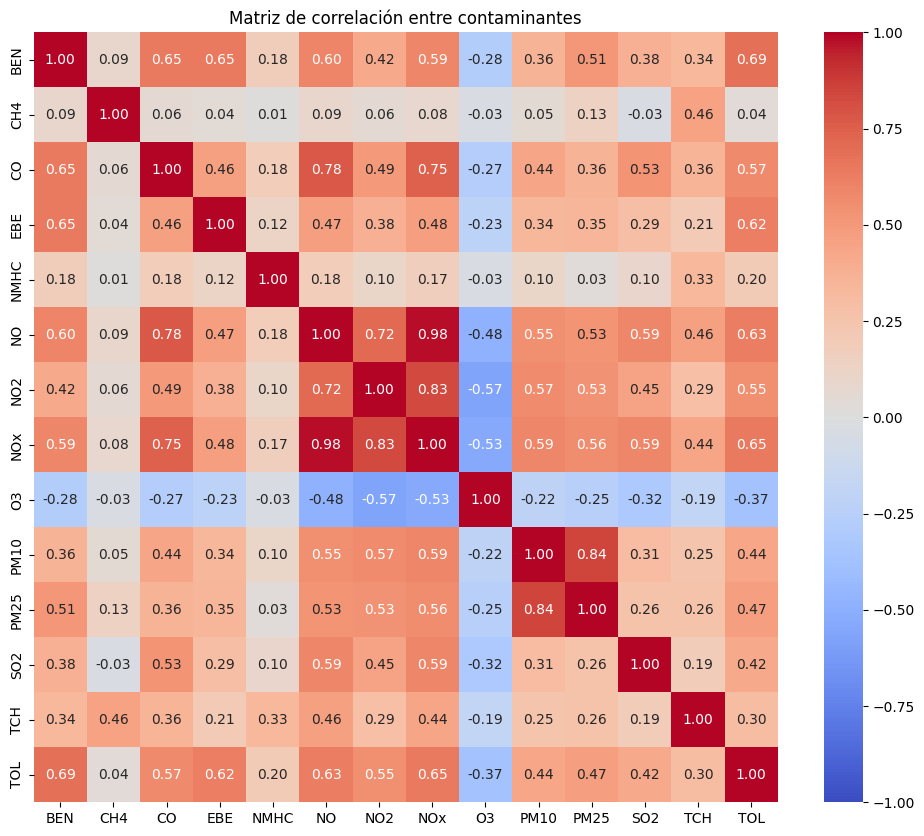

In [11]:
# Correlación entre contaminantes
corr = df[contaminantes].corr()

# Matriz de correlación visual
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación entre contaminantes")
plt.show()

Correlaciones positivas fuertes:

CO y NO (0.78), CO y NOx (0.75), NO y NOx (0.98), NOx y NO2 (0.83)
Esto indica que estos contaminantes provienen de fuentes comunes, muy probablemente tráfico y combustión de vehículos, porque estos gases suelen emitirse juntos.

NOx = NO + NO2, así que la correlación alta entre NO y NOx es esperada.

CO y NO también son típicos de emisiones de motores de combustión interna.

Correlaciones negativas:

O3 vs NO2 (-0.57), O3 vs NOx (-0.53), O3 vs NO (-0.48)
Esto refleja la química atmosférica del ozono urbano:

O₃ se produce por reacción fotoquímica de NO₂ y compuestos orgánicos volátiles (VOCs) bajo luz solar.

Cuando hay mucho NOx, el NO puede reaccionar con O₃ destruyéndolo (efecto titración).

Por eso, en zonas urbanas con tráfico intenso, O₃ tiende a ser menor cuando NO₂ y NOx son altos, entre otras causas.

- Laborables vs fines de semana: ¿Hay diferencias en los niveles de los gases relacionados promedio entre días laborables y fines de semana?

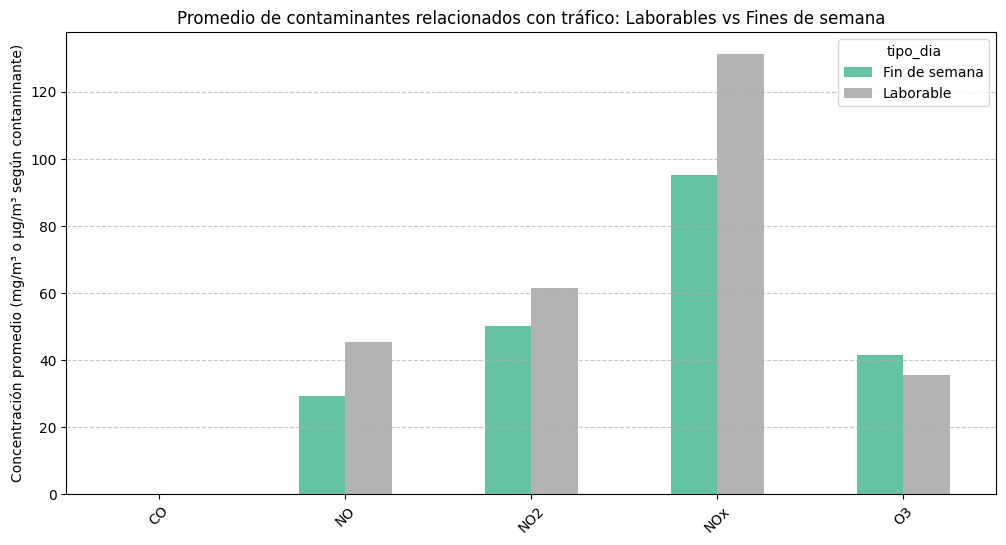

In [12]:
# Contaminantes de interés
contaminantes_trafico = ["CO", "NO", "NO2", "NOx", "O3"]

df["dia_semana"] = df["Time"].dt.weekday
df["tipo_dia"] = df["dia_semana"].apply(lambda x: "Laborable" if x < 5 else "Fin de semana")

# Promedio por tipo de día (laborable vs fin de semana)
promedio_dia = df.groupby("tipo_dia")[contaminantes_trafico].mean()

# Gráfico de barras con colores distintos para cada contaminante
promedio_dia.T.plot(
    kind="bar", 
    figsize=(12,6), 
    colormap="Set2"
)
plt.ylabel("Concentración promedio (mg/m³ o µg/m³ según contaminante)")
plt.title("Promedio de contaminantes relacionados con tráfico: Laborables vs Fines de semana")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Los gases de tráfico (CO, NO, NO₂, NOx) son más altos en días laborables, como se espera por mayor tráfico.

Observar cómo O₃ se comporta: normalmente puede ser más alto en fines de semana, ya que hay menos NOx que lo titra.

- Variación horaria: ¿A qué horas del día se concentran los picos de estos gases en promedio durante el año?

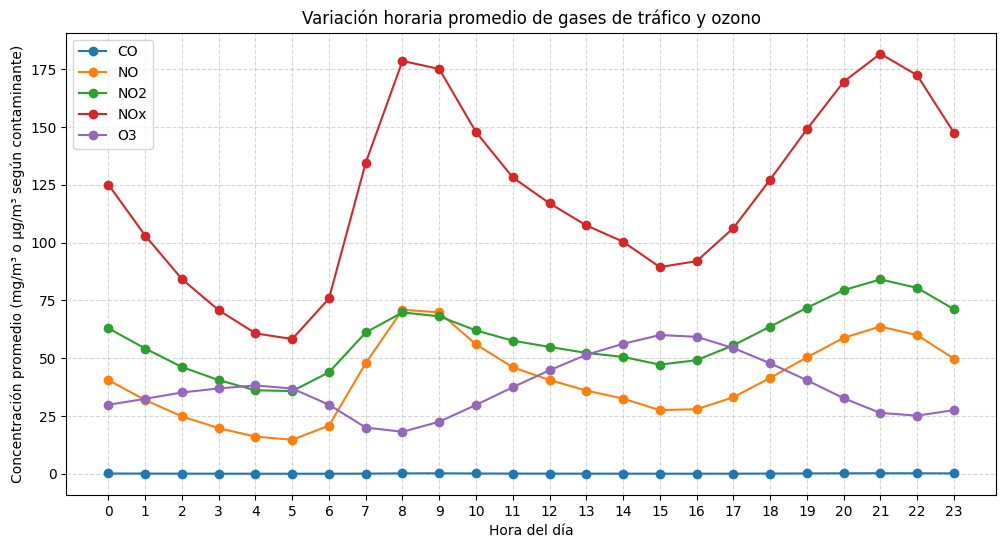

In [13]:
# Contaminantes de interés
contaminantes_trafico = ["CO", "NO", "NO2", "NOx", "O3"]

# Promedio por hora solo de los contaminantes seleccionados
promedio_hora = df.groupby("hour")[contaminantes_trafico].mean()

# Gráfico de líneas con colores distintos
plt.figure(figsize=(12,6))
for gas in contaminantes_trafico:
    plt.plot(promedio_hora.index, promedio_hora[gas], marker='o', label=gas)

plt.xlabel("Hora del día")
plt.ylabel("Concentración promedio (mg/m³ o µg/m³ según contaminante)")
plt.title("Variación horaria promedio de gases de tráfico y ozono")
plt.xticks(range(0,24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

Picos de tráfico:

CO, NO, NO₂ y NOx muestran picos en horas punta.

Ozono (O₃):

Alcanza su máximo al mediodía, cuando la radiación solar favorece su formación y hay menos NO que lo titra.

- Evolución por año: Vamos a evaluar la evolución de las contaminaciones con el paso de los años.

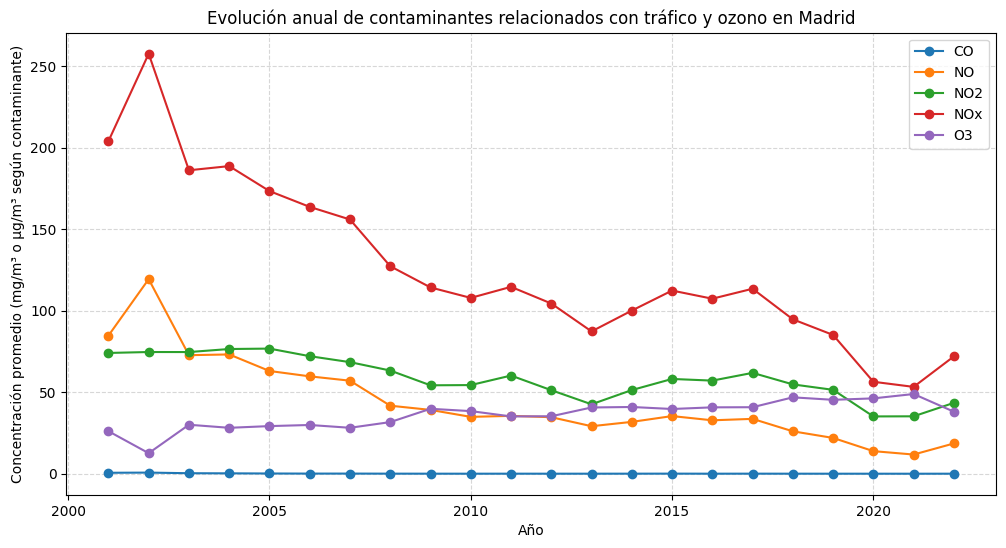

In [14]:
# Promedio por año
promedio_anual = df.groupby("year")[contaminantes_trafico].mean()

# Gráfico de líneas
plt.figure(figsize=(12,6))
for gas in contaminantes_trafico:
    plt.plot(promedio_anual.index, promedio_anual[gas], marker="o", label=gas)

plt.xlabel("Año")
plt.ylabel("Concentración promedio (mg/m³ o µg/m³ según contaminante)")
plt.title("Evolución anual de contaminantes relacionados con tráfico y ozono en Madrid")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

Situación en los años 2000–2005

Tráfico muy intenso y diésel:
A principios de los 2000 el parque automovilístico madrileño creció mucho, con fuerte presencia de vehículos diésel. Estos emiten grandes cantidades de NOx (NO + NO₂) y CO.

Normativa aún en transición:
La legislación europea de calidad del aire y las normas Euro para vehículos (Euro 3 en 2000, Euro 4 en 2005) estaban empezando a aplicarse, pero los efectos aún tardaron en notarse.

Calefacciones y emisiones industriales:
También había más emisiones de calefacciones domésticas e industriales con combustibles más contaminantes.

Factores de descenso posterior

Normas Euro más estrictas (Euro 4, 5 y 6) que redujeron progresivamente NOx y CO en vehículos nuevos.

Renovación del parque móvil: aumento de vehículos de gasolina más limpios y, a partir de 2010, de híbridos.

Políticas locales:

Planes de Calidad del Aire de la Comunidad de Madrid.

Restricciones de tráfico en episodios de alta contaminación.

En años recientes, Madrid Central (desde finales de 2018) reforzó esa tendencia.

Cambio de combustibles domésticos: menos carbón y gasóleo para calefacción.

Como podemos ver, desde principios de los 2000 los motores de gasolina incorporan catalizadores de tres vías, que eliminan la mayor parte del CO del escape.

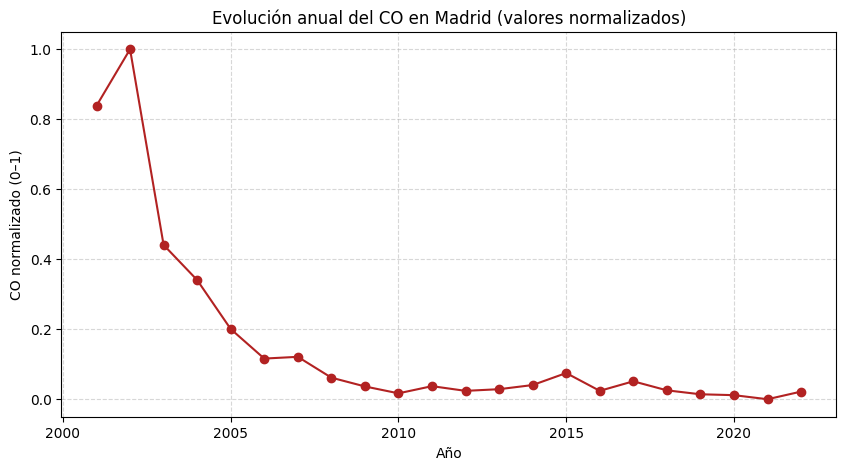

In [15]:
# Serie de CO promedio anual
co_anual = promedio_anual["CO"]

# Normalización min–max a rango 0–1
co_norm = (co_anual - co_anual.min()) / (co_anual.max() - co_anual.min())

plt.figure(figsize=(10,5))
plt.plot(co_norm.index, co_norm, marker='o', color='firebrick')
plt.xlabel("Año")
plt.ylabel("CO normalizado (0–1)")
plt.title("Evolución anual del CO en Madrid (valores normalizados)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()